# Modelos Lineales Predictivos para <span style="color: rgb(138, 92, 245);">Precios de Autos</span>
--------------------------------------

## <span style="color: rgb(138, 92, 245);">INTRODUCCIÓN</span>

Este mismo notebook estará disponible en el siguiente repositorio: [used_cars_price_prediction
](https://github.com/AuriRaven/used_cars_price_prediction)


## <span style="color: rgb(138, 92, 245);">OBJETIVO</span>

El reto de la práctica, consiste en generar un modelo que sea capaz de predecir con una alta exactitud el valor de los coches, explicando como mínimo el 80% de la varianza general (es decir con un r2 de .8 como mínimo). Ustedes pueden crear las variables que deseen, aquí tenemos el ejemplo de cómo crear unas a partir de una variable discreta. La intención es que trabajen con los datos para poder obtener el resultado deseado.  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## <span style="color: rgb(138, 92, 245);">1. Extracción de Datos</span>

* Descargamos nuestros datos desde la siguiente dirección: [Used Cars.zip](https://drive.google.com/file/d/1fAcZEO0HAw99Ha2pN5l3-VNnUCueCB_a/view?usp=classroom_web&authuser=0)

* Guardamos nuestros datos en nuestro directorio de trabajo designado:

In [2]:
print(os.getcwd())

c:\Users\Aura De La Garza G\OneDrive\Documentos\Practica_1_Modulo_2


Comenzaremos por revisar nuestro directorio de datos y definimos su ubicación como la ruta de extracción de archivos. Iteramos sobre los archivos disponibles en nuestro directorio de trabajo y leemos cada uno con un lector de archivos csv. 

In [3]:
ruta = r"C:\Users\Aura De La Garza G\OneDrive\Documentos\Practica_1_Modulo_2\Used Cars\Used Cars"

In [4]:
# Diccionario de mapeo: {nombre_actual: nombre_correcto}
mapeo_nombres = {
    "Audi": "Audi",
    "Bmw": "BMW",
    "Cclass": "Mercedes C-Class",
    "Focus": "Ford Focus",
    "Ford": "Ford",
    "Hyundi": "Hyundai",
    "Merc": "Mercedes",
    "Skoda": "Skoda",
    "Toyota": "Toyota",
    "Unclean Cclass": "Mercedes C-Class (Unclean)",
    "Unclean Focus": "Ford Focus (Unclean)",
    "Vauxhall": "Vauxhall",
    "Vw": "Volkswagen"
}

Leemos cada dataframe de la carpeta "Used Cars" y los guardamos en un diccionario con su respectivo nombre como llave. 

In [5]:
# Crear diccionario con los DataFrames
dfs = {
    os.path.splitext(archivo)[0].title(): pd.read_csv(os.path.join(ruta, archivo))
    for archivo in os.listdir(ruta)
    if archivo.endswith(".csv")
}

In [6]:
print("Dataframes disponibles en el diccionario:\n", list(dfs.keys()))

Dataframes disponibles en el diccionario:
 ['Audi', 'Bmw', 'Cclass', 'Focus', 'Ford', 'Hyundi', 'Merc', 'Skoda', 'Toyota', 'Unclean Cclass', 'Unclean Focus', 'Vauxhall', 'Vw']


Utilizamos el diccionario que inicializamos al principo para poder mapear los valores de las llaves de nuestro diccionario de dataframes con su nombre correcto. 

In [7]:
# Crear un nuevo diccionario con las claves corregidas
dfs_cars = {mapeo_nombres[k]: v for k, v in dfs.items() if k in mapeo_nombres}

# Ejemplo de verificación
print("Claves corregidas:\n", list(dfs_cars.keys()))

Claves corregidas:
 ['Audi', 'BMW', 'Mercedes C-Class', 'Ford Focus', 'Ford', 'Hyundai', 'Mercedes', 'Skoda', 'Toyota', 'Mercedes C-Class (Unclean)', 'Ford Focus (Unclean)', 'Vauxhall', 'Volkswagen']


Posteriormente, procedemos a ver los primeros registros de cada dataframe así como sus tamaños. 

In [8]:
# Observamos los primeros registros de cada DataFrame CSV
for nombre, df in dfs_cars.items():
    print(f"Archivo: {nombre}")
    print(f"Tamaño: {df.shape}")
    display(df.head())  # O df.info() si quieres más detalle
    print("-" * 60)

Archivo: Audi
Tamaño: (10668, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


------------------------------------------------------------
Archivo: BMW
Tamaño: (10781, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


------------------------------------------------------------
Archivo: Mercedes C-Class
Tamaño: (3899, 7)


,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


------------------------------------------------------------
Archivo: Ford Focus
Tamaño: (5454, 7)


,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6


------------------------------------------------------------
Archivo: Ford
Tamaño: (17965, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


------------------------------------------------------------
Archivo: Hyundai
Tamaño: (4860, 9)


,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


------------------------------------------------------------
Archivo: Mercedes
Tamaño: (13119, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


------------------------------------------------------------
Archivo: Skoda
Tamaño: (6267, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


------------------------------------------------------------
Archivo: Toyota
Tamaño: (6738, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


------------------------------------------------------------
Archivo: Mercedes C-Class (Unclean)
Tamaño: (4006, 11)


,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


------------------------------------------------------------
Archivo: Ford Focus (Unclean)
Tamaño: (5604, 11)


,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057


------------------------------------------------------------
Archivo: Vauxhall
Tamaño: (13632, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4


------------------------------------------------------------
Archivo: Volkswagen
Tamaño: (15157, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


------------------------------------------------------------


Luego, continuamos por revisar el tipo de dato que corresponde a cada columna de cada dataframe. 

In [9]:
# Observamos las dimensiones de cada DataFrame CSV
for nombre, df in dfs_cars.items():
    print(f"Nombre del Dataframe {nombre}")
    print(f"Columnas del Dataframe {nombre} y sus tipos de dato:")
    print(df.dtypes)
    print("-" * 60)

Nombre del Dataframe Audi
Columnas del Dataframe Audi y sus tipos de dato:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object
------------------------------------------------------------
Nombre del Dataframe BMW
Columnas del Dataframe BMW y sus tipos de dato:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object
------------------------------------------------------------
Nombre del Dataframe Mercedes C-Class
Columnas del Dataframe Mercedes C-Class y sus tipos de dato:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
dty

Podemos notar que, el dataframe de Mercedez y Ford también tiene información de los modelos C-Class y Focus respectivamente. 

In [10]:
dfs_cars['Mercedes'][dfs_cars['Mercedes']['model'] == ' C Class'].shape

(3747, 9)

In [11]:
dfs_cars['Ford'][dfs_cars['Ford']['model'] == ' Focus'].shape

(4588, 9)

Optamos por utilizar los dataframes de "C-Class" y "Ford Focus" que están limpios e ignoramos los que tienen la etiqueta de estar sucios. 

In [12]:
# Filtramos solo los dataframes que NO tienen "Unclean" en el nombre
dfs_clean = {name: df for name, df in dfs_cars.items() if "Unclean" not in name}

Además agregamos la columna de marca a cada dataframe.

In [13]:
# Añadimos la columna brand, ordenamos y reseteamos índice
dfs_with_brand = {}
for name, df in dfs_clean.items():
    brand = name.split()[0]  # Tomamos la primera palabra del nombre del archivo
    df = df.copy()
    df["brand"] = brand
    
    # Ordenar por año (descendente: más nuevos primero)
    df = df.sort_values(by="year", ascending=True)
    
    # Resetear índice
    df = df.reset_index(drop=True)
    
    dfs_with_brand[name] = df

In [14]:
# Observamos los primeros registros de cada DataFrame CSV
for nombre, df in dfs_with_brand.items():
    print(f"Archivo: {nombre}")
    print(f"Tamaño: {df.shape}")
    display(df.head())  # O df.info() si quieres más detalle
    print("-" * 60)

Archivo: Audi
Tamaño: (10668, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A8,1997,4650,Automatic,122000,Petrol,265,18.9,4.2,Audi
1,A3,1998,4999,Automatic,55000,Petrol,265,30.4,1.8,Audi
2,TT,2002,1990,Manual,131925,Petrol,325,30.1,1.8,Audi
3,TT,2002,2876,Manual,99000,Petrol,295,30.1,1.8,Audi
4,A6,2003,2495,Automatic,117000,Diesel,290,39.8,2.5,Audi


------------------------------------------------------------
Archivo: BMW
Tamaño: (10781, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8,BMW
1,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9,BMW
2,Z3,1998,3950,Manual,56500,Petrol,270,35.3,1.9,BMW
3,Z3,1999,3995,Manual,51949,Petrol,255,35.3,1.9,BMW
4,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,BMW


------------------------------------------------------------
Archivo: Mercedes C-Class
Tamaño: (3899, 8)


,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,C Class,1991,4450,Automatic,170000,Petrol,3.0,Mercedes
1,C Class,1995,4750,Automatic,173000,Petrol,3.6,Mercedes
2,C Class,1998,1290,Automatic,140000,Petrol,2.0,Mercedes
3,C Class,2002,3690,Automatic,20000,Petrol,2.6,Mercedes
4,C Class,2002,1295,Automatic,82700,Diesel,2.7,Mercedes


------------------------------------------------------------
Archivo: Ford Focus
Tamaño: (5454, 8)


,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,Focus,2002,795,Manual,101000,Petrol,1.6,Ford
1,Focus,2003,1575,Automatic,111000,Petrol,2.0,Ford
2,Focus,2003,1695,Manual,89630,Petrol,1.6,Ford
3,Focus,2003,495,Manual,177644,Petrol,1.6,Ford
4,Focus,2003,3999,Manual,56064,Petrol,2.0,Ford


------------------------------------------------------------
Archivo: Ford
Tamaño: (17965, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Escort,1996,3000,Manual,50000,Petrol,265,34.4,1.8,Ford
1,Fiesta,1998,2699,Manual,37000,Petrol,160,41.5,1.2,Ford
2,Fiesta,2000,1995,Manual,43000,Petrol,160,41.5,1.3,Ford
3,Puma,2002,2695,Manual,69000,Petrol,220,38.7,1.6,Ford
4,Mondeo,2002,895,Manual,136784,Petrol,300,36.2,1.8,Ford


------------------------------------------------------------
Archivo: Hyundai
Tamaño: (4860, 10)


,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize,brand
0,Accent,2000,1295,Automatic,47000,Petrol,150,38.7,1.3,Hyundai
1,Santa Fe,2002,1200,Manual,94000,Petrol,325,30.4,2.4,Hyundai
2,Terracan,2003,3290,Manual,78000,Diesel,325,32.8,2.9,Hyundai
3,Getz,2003,2395,Automatic,59000,Petrol,260,37.2,1.3,Hyundai
4,Getz,2003,1990,Automatic,51000,Petrol,260,37.2,1.6,Hyundai


------------------------------------------------------------
Archivo: Mercedes
Tamaño: (13119, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0,Mercedes
1,SL CLASS,1997,9995,Automatic,76000,Petrol,255,28.2,3.2,Mercedes
2,SL CLASS,1998,10450,Automatic,49000,Petrol,255,28.2,3.2,Mercedes
3,SLK,1998,1990,Automatic,113557,Petrol,265,32.1,2.3,Mercedes
4,SLK,1998,1990,Automatic,99300,Petrol,265,32.1,2.3,Mercedes


------------------------------------------------------------
Archivo: Skoda
Tamaño: (6267, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Fabia,2004,1295,Manual,96000,Petrol,165,47.1,1.2,Skoda
1,Fabia,2005,2691,Manual,34982,Petrol,200,43.5,1.4,Skoda
2,Octavia,2005,1495,Manual,119017,Diesel,160,47.9,2.0,Skoda
3,Fabia,2006,1295,Manual,100964,Petrol,160,47.1,1.2,Skoda
4,Fabia,2006,1295,Manual,141000,Diesel,125,60.1,1.4,Skoda


------------------------------------------------------------
Archivo: Toyota
Tamaño: (6738, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Land Cruiser,1998,19990,Manual,100000,Diesel,265,23.9,4.2,Toyota
1,Yaris,1999,1995,Automatic,89000,Petrol,160,42.9,1.3,Toyota
2,Yaris,2000,2695,Automatic,21000,Petrol,160,42.9,1.3,Toyota
3,Corolla,2001,899,Automatic,76000,Petrol,300,35.3,1.6,Toyota
4,Yaris,2002,2695,Automatic,21000,Petrol,200,42.2,1.3,Toyota


------------------------------------------------------------
Archivo: Vauxhall
Tamaño: (13632, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Zafira,1970,10495,Manual,37357,Petrol,200,42.2,1.4,Vauxhall
1,Astra,1997,950,Manual,89233,Petrol,265,35.8,1.6,Vauxhall
2,Corsa,2001,1888,Semi-Auto,45000,Petrol,160,45.6,1.2,Vauxhall
3,Astra,2001,450,Manual,159000,Petrol,235,40.4,1.6,Vauxhall
4,Corsa,2002,1500,Semi-Auto,58000,Petrol,160,45.6,1.2,Vauxhall


------------------------------------------------------------
Archivo: Volkswagen
Tamaño: (15157, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Golf,2000,1999,Manual,80670,Petrol,245,35.8,2.0,Volkswagen
1,Beetle,2001,1295,Manual,110000,Petrol,200,49.6,1.6,Volkswagen
2,Beetle,2001,2490,Manual,47729,Petrol,330,32.5,2.0,Volkswagen
3,Beetle,2001,899,Automatic,1,Petrol,325,29.7,2.0,Volkswagen
4,Sharan,2001,3490,Manual,68010,Petrol,330,30.1,2.0,Volkswagen


------------------------------------------------------------


Renombramos la columna 'tax(£)' de la tabla de Hyunday como 'tax'. De esta manera, podremos concatenarla con las demás sin agregar columnas duplicadas.   

In [15]:
dfs_with_brand['Hyundai'].rename(columns={'tax(£)': 'tax'}, inplace=True)

Ahora, procedemos a crear la tabla analítica de datos para predecir el precio de autos usados. 

In [16]:
# Concatenamos todos en un solo dataframe estructurado
df_all_cars = pd.concat(dfs_with_brand.values(), ignore_index=True)

In [17]:
df_all_cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A8,1997,4650,Automatic,122000,Petrol,265.0,18.9,4.2,Audi
1,A3,1998,4999,Automatic,55000,Petrol,265.0,30.4,1.8,Audi
2,TT,2002,1990,Manual,131925,Petrol,325.0,30.1,1.8,Audi
3,TT,2002,2876,Manual,99000,Petrol,295.0,30.1,1.8,Audi
4,A6,2003,2495,Automatic,117000,Diesel,290.0,39.8,2.5,Audi


In [18]:
df_all_cars.shape

(108540, 10)

## <span style="color: rgb(138, 92, 245);">2. Transformación de Datos</span>

### <span style="color: rgb(138, 92, 245);">2.1 Limpieza e Ingeniería de Datos</span>

#### <span style="color: rgb(138, 92, 245);">2.1.1 Valores Ausentes</span>

Comenzamos por identificar las columnas que contienen valores nulos. Definimos una función que nos calculará el porcentaje de valores nulos por columna. 

In [19]:
# Checa porcentajes de valores nulos en columnas
def completitud_datos(df):
    return df.isnull().sum().sort_values(ascending=False) / df.shape[0]

In [20]:
completitud_datos(df_all_cars)

tax             0.086171
mpg             0.086171
year            0.000000
model           0.000000
price           0.000000
transmission    0.000000
fuelType        0.000000
mileage         0.000000
engineSize      0.000000
brand           0.000000
dtype: float64

Podemos observar que las únicas columnas con valores nulos son 'tax' y 'mpg'. Esto se debe a que, en el momento en que juntamos todos nuestros dataframes, los únicos que no tenían la columna 'tax' y 'mpg' eran los dataframes de Mercedes C-Class y Ford Focus. Por lo tanto, los valores nulos corresponden a esos dataframes. Podemos ver que los valores nulos corresponden aproximadamente al 8% de todos los datos. Por ello, optamos por imputarlos utilizando la media de nuestros valores restantes. 

In [21]:
df_all_cars.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
brand            object
dtype: object

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_all_cars[['mpg', 'tax']] = imputer.fit_transform(df_all_cars[['mpg', 'tax']])

In [23]:
completitud_datos(df_all_cars)

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
brand           0.0
dtype: float64

### <span style="color: rgb(138, 92, 245);">2.2 Creación de Nuevas Variables</span>

In [24]:
from datetime import datetime

# Año actual
current_year = datetime.now().year

# Copia del dataframe para no modificar el original
df_features = df_all_cars.copy()

In [25]:
# Variable basadas en el año del vehículo
df_features['car_age'] = current_year - df_features['year']

In [26]:
# Variables basadas en kilometraje
df_features['mileage_per_year'] = df_features['mileage'] / df_features['car_age'].replace(0, 1)  
df_features['is_high_mileage'] = (df_features['mileage_per_year'] > df_features['mileage_per_year'].median()).astype(int)

In [27]:
# Variables relacionadas con motor y eficiencia
df_features['power_efficiency'] = df_features['engineSize'] / df_features['mpg']
df_features['mileage_per_litre'] = df_features['mileage'] / (df_features['engineSize'] * df_features['car_age'].replace(0, 1))
df_features['engine_tax_ratio'] = df_features['engineSize'] / df_features['tax'].replace(0, 1)

In [28]:
# Variable basada en tipo de transmisión
df_features['is_automatic'] = (df_features['transmission'].str.lower() == 'automatic').astype(int)

In [29]:
# Variables binarias por categoría de marca
luxury_brands = ['Audi', 'BMW', 'Mercedes']
economy_brands = ['Toyota', 'Hyundai', 'Skoda', 'Ford']

df_features['is_luxury_brand'] = df_features['brand'].isin(luxury_brands).astype(int)
df_features['is_economy_brand'] = df_features['brand'].isin(economy_brands).astype(int)

In [30]:
# Definir umbral para "alto impuesto"
tax_threshold = df_features['tax'].median()
df_features['is_high_tax'] = (df_features['tax'] > tax_threshold).astype(int)

In [31]:
# 1. Extract the 'price' column
price_column = df_features['price']

# 2. Drop the 'price' column from its original position
df_features = df_features.drop('price', axis=1)

# 3. Add the 'price' column back, which places it at the end
df_features['price'] = price_column

In [32]:
df_features.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,brand,car_age,mileage_per_year,is_high_mileage,power_efficiency,mileage_per_litre,engine_tax_ratio,is_automatic,is_luxury_brand,is_economy_brand,is_high_tax,price
0,A8,1997,Automatic,122000,Petrol,265.0,18.9,4.2,Audi,28,4357.142857,1,0.222222,1037.414966,0.015849,1,1,0,1,4650
1,A3,1998,Automatic,55000,Petrol,265.0,30.4,1.8,Audi,27,2037.037037,0,0.059211,1131.687243,0.006792,1,1,0,1,4999
2,TT,2002,Manual,131925,Petrol,325.0,30.1,1.8,Audi,23,5735.869565,1,0.059801,3186.594203,0.005538,0,1,0,1,1990
3,TT,2002,Manual,99000,Petrol,295.0,30.1,1.8,Audi,23,4304.347826,1,0.059801,2391.304348,0.006102,0,1,0,1,2876
4,A6,2003,Automatic,117000,Diesel,290.0,39.8,2.5,Audi,22,5318.181818,1,0.062814,2127.272727,0.008621,1,1,0,1,2495


In [33]:
df_features['year'].max()

np.int64(2060)

#### <span style="color: rgb(138, 92, 245);">2.2.1 Valores Extremos</span>

Comenzamos por eliminar valores considerados como infinitos. 

In [34]:
def remove_infinite(df, how="drop"):
    """
    Elimina o reemplaza valores infinitos de un DataFrame.
    
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame a limpiar.
    how : str, default="drop"
        - "drop": elimina filas que contienen infinitos.
        - "nan": reemplaza infinitos por NaN (para luego poder imputar).
    
    Retorna
    -------
    pd.DataFrame
        DataFrame limpio.
    """
    if how == "drop":
        df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()
    elif how == "nan":
        df_clean = df.replace([np.inf, -np.inf], np.nan)
    else:
        raise ValueError("El parámetro 'how' debe ser 'drop' o 'nan'.")
    
    return df_clean


In [35]:
df_features = remove_infinite(df_features, how="drop")

Una vez que removimos los valores infinitos, podemos proceder a tratar los valores extremos de nuestro dataframe tanto con metodos univariados como multivariados. 

* **Univariados:** IQR y Z-Score
* **Multivariados:** Isolation Forest y DBSCAN

Posterior a ello, podemos comparar el porcentaje de datos perdidos respecto a los datos originales. Recordemos que, para realmente ver cuál es el mejor método de tratamiento de outliers, necesitamos hacer comparaciones en la distribución de los datos, así como su desempeño en los modelos predictivos que utilizaremos. 

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy import stats

# 1. UNIVARIADO: OUTLIERS POR IQR O Z-SCORE
def tratar_outliers_univariado(df, metodo='IQR'):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if metodo == 'IQR':
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower) & (df[col] <= upper)]
    elif metodo == 'Z-Score':
        z_scores = np.abs(stats.zscore(df[numeric_cols]))
        df = df[(z_scores < 3).all(axis=1)]
    else:
        raise ValueError("Método no válido. Usa 'IQR' o 'Z-Score'.")
    return df

# 2. MULTIVARIADO: OUTLIERS POR ISOLATION FOREST O DBSCAN
def tratar_outliers_multivariado(df, metodo='IsolationForest'):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[numeric_cols])

    if metodo == 'IsolationForest':
        iso = IsolationForest(contamination=0.05, random_state=42)
        outliers = iso.fit_predict(X_scaled)
        df = df[outliers == 1]
    elif metodo == 'DBSCAN':
        db = DBSCAN(eps=1.5, min_samples=5)
        clusters = db.fit_predict(X_scaled)
        df = df[clusters != -1]
    else:
        raise ValueError("Método no válido. Usa 'IsolationForest' o 'DBSCAN'.")
    return df

# 3. COMPARACIÓN DE PÉRDIDA DE INFORMACIÓN
def comparar_metodos_outliers(df):
    resultados = {}
    total_original = df.shape[0]

    # Métodos univariados
    for metodo in ['IQR', 'Z-Score']:
        df_filtrado = tratar_outliers_univariado(df, metodo)
        resultados[f"Univariado - {metodo}"] = total_original - df_filtrado.shape[0]

    # Métodos multivariados
    for metodo in ['IsolationForest', 'DBSCAN']:
        df_filtrado = tratar_outliers_multivariado(df, metodo)
        resultados[f"Multivariado - {metodo}"] = total_original - df_filtrado.shape[0]

    resultados_df = pd.DataFrame.from_dict(resultados, orient='index', columns=['Filas eliminadas'])
    resultados_df['% pérdida'] = (resultados_df['Filas eliminadas'] / total_original * 100).round(2)
    return resultados_df

# 4. REMOVER VARIABLES CON CORRELACIÓN = 1 O -1
def remover_variables_correlacionadas(df):
    # Solo selecciona columnas numéricas
    df_numerico = df.select_dtypes(include=[np.number])
    
    # Calcular matriz de correlación
    corr_matrix = df_numerico.corr().abs()
    
    # Obtener triángulo superior para evitar duplicados
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identificar columnas con correlación 1
    columnas_a_remover = [col for col in upper.columns if any(upper[col] == 1)]
    
    # Eliminar del dataframe original (no solo numérico)
    df_reducido = df.drop(columns=columnas_a_remover)
    
    return df_reducido, columnas_a_remover


Podemos ver cuales son los métodos que más reducen nuestro porcentaje de datos y los que menos lo hacen. Optamos mientras por seleccionar el método DBSCAN, pues solo se limita a eliminar valores muy extremos y nos permite mantener la mayor varianza posible. Incluso, podemos notar que, una vez tratando outliers, se han eliminado registros erroneos, como lo es un auto usado modelo 2060 (lo cuál, aún no es posible). 

In [37]:
# Comparar métodos
resumen = comparar_metodos_outliers(df_features)
print(resumen)

# Elegir método óptimo:
df_tratado = tratar_outliers_multivariado(df_features, metodo='DBSCAN')

# Remover variables altamente correlacionadas
df_final, columnas_removidas = remover_variables_correlacionadas(df_tratado)

print(f"Columnas removidas por correlación perfecta: {columnas_removidas}")

                                Filas eliminadas  % pérdida
Univariado - IQR                           63368      58.54
Univariado - Z-Score                        9893       9.14
Multivariado - IsolationForest              5413       5.00
Multivariado - DBSCAN                        828       0.76
Columnas removidas por correlación perfecta: []


In [38]:
df_final['year'].max()

np.int64(2020)

### <span style="color: rgb(138, 92, 245);">2.3 Análisis Exploratio de Datos (EDA)</span>

Ahora que eliminamos los valores nulos, podemos visualizar nuestros datos antes de tratar outliers o eliminar colinealidad en nuevas valiables. Esto nos permitira ver la distribución original de los datos y compararla con la distribución de datos post-procesados. 

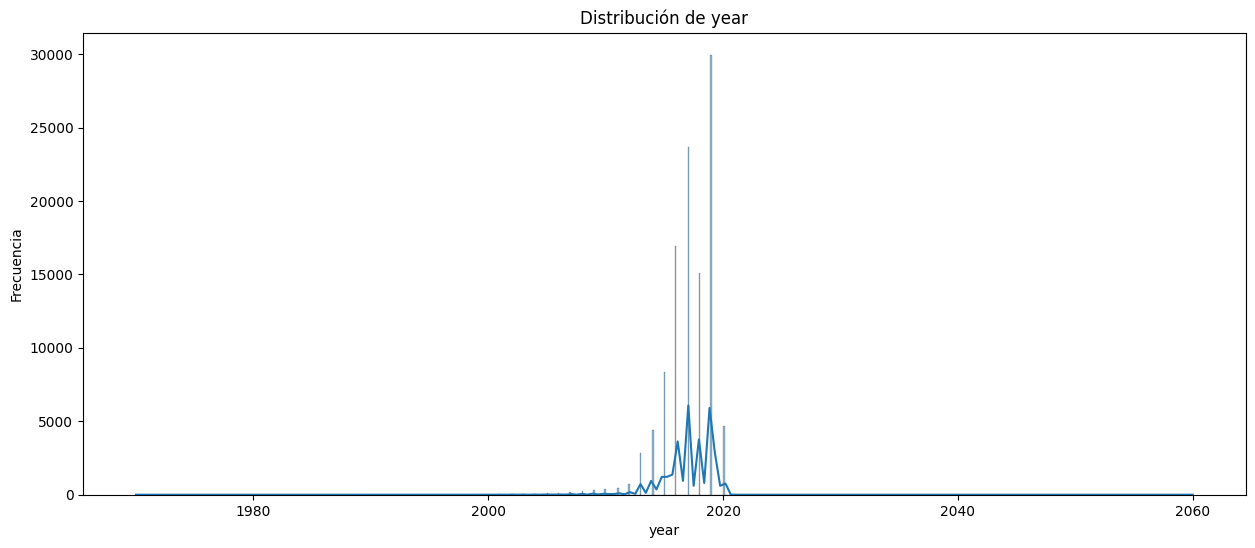

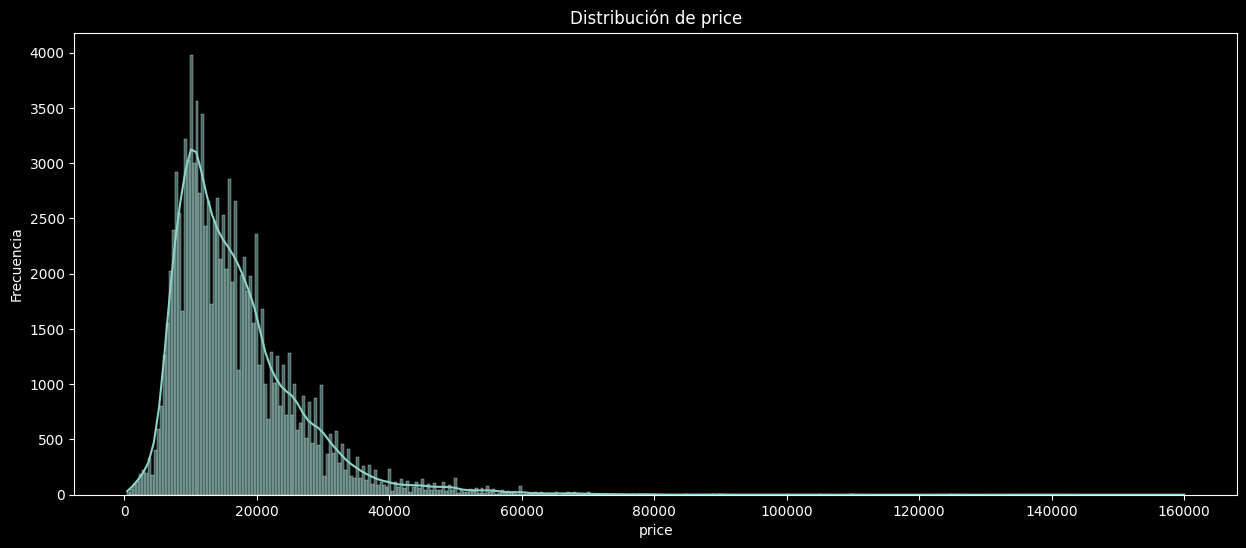

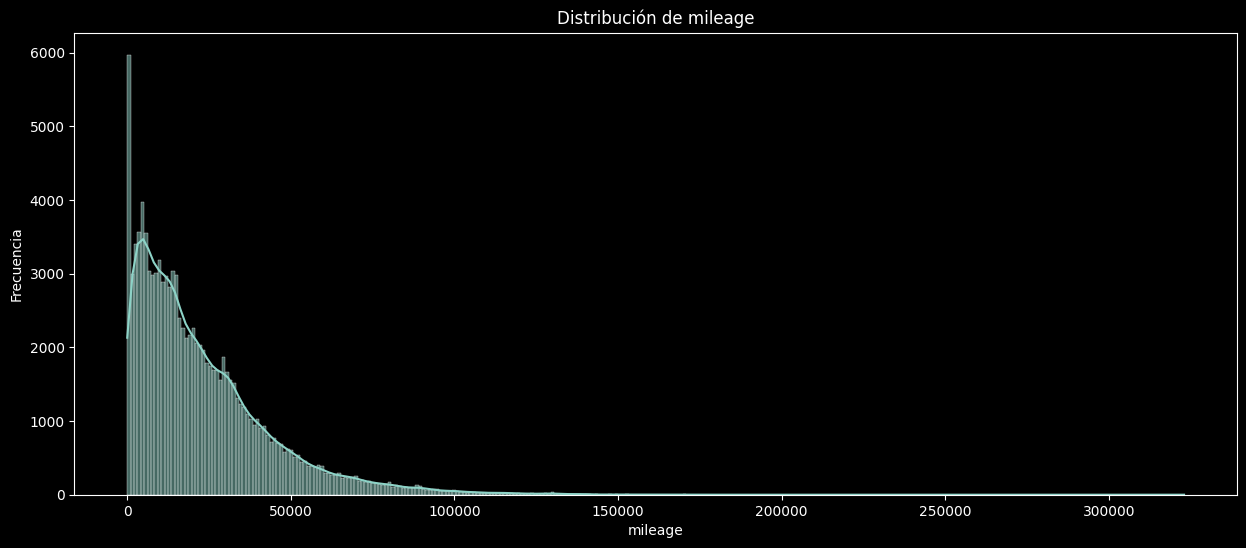

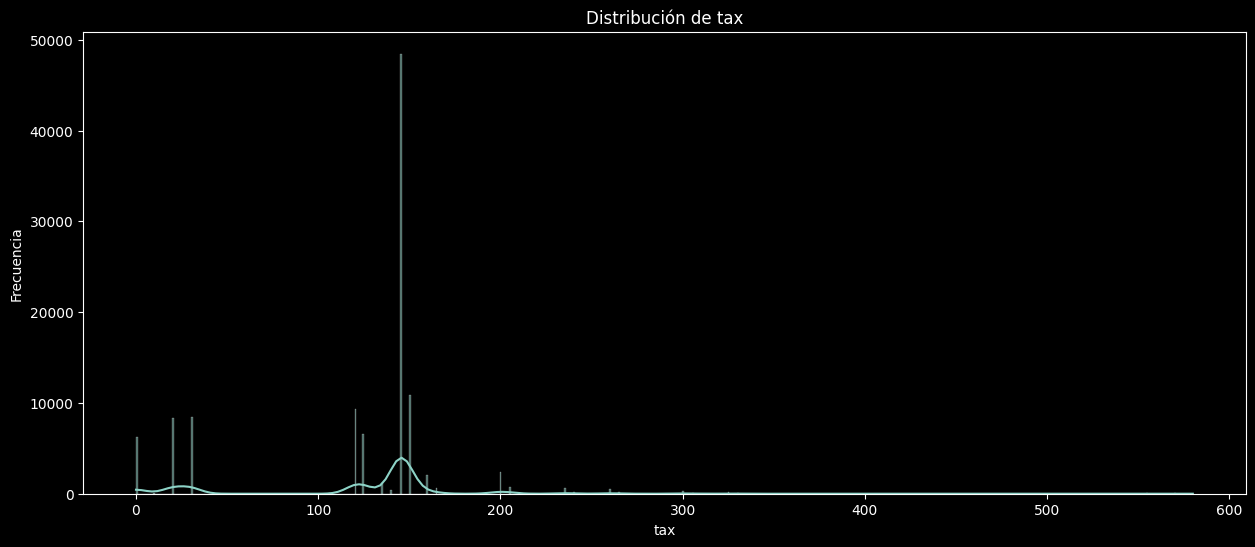

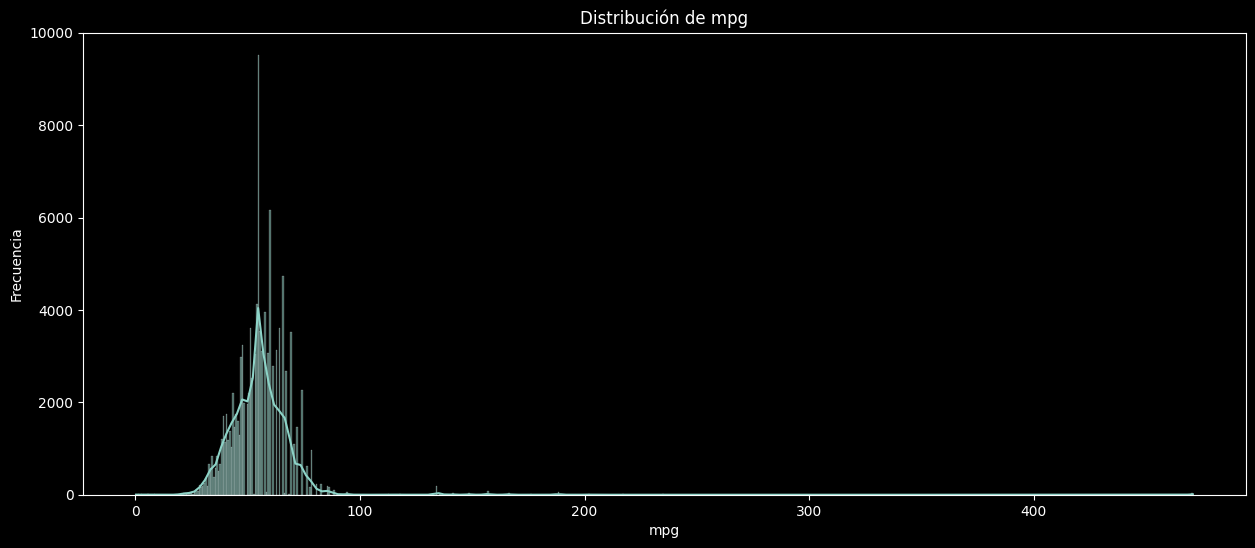

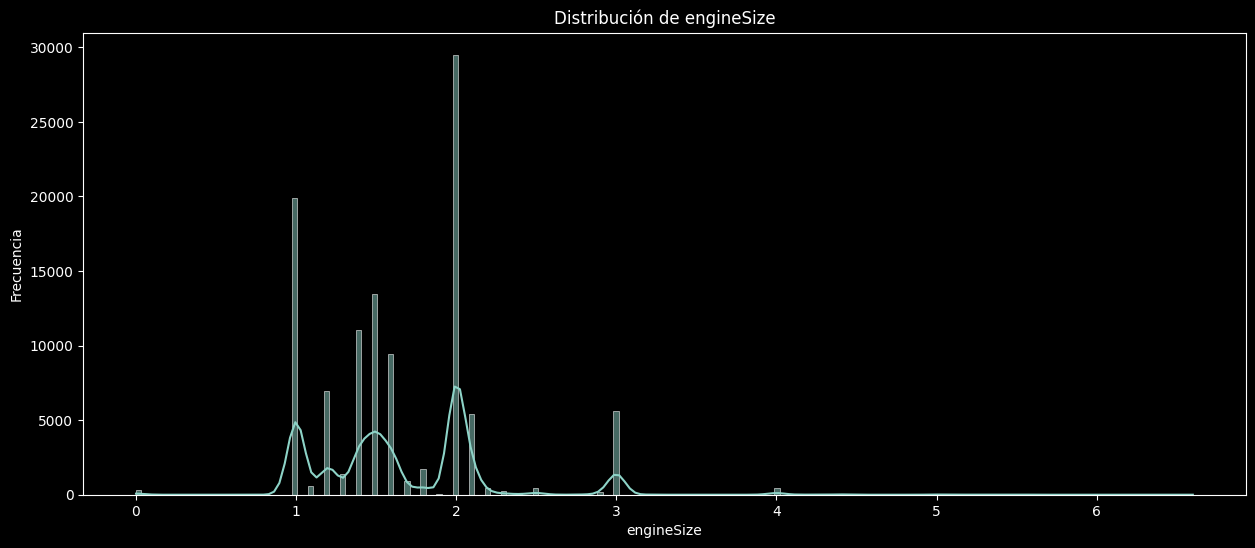

In [39]:
for column in df_all_cars.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df_all_cars[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.style.use('dark_background')
    plt.grid(False)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Procedemos también a generar algunos gráficos interactivos que nos podrían ayudar a comprender mejor nuestros datos. 

In [40]:
import pandas as pd
import plotly.express as px

# --- Agregación: precio promedio por marca ---
agg = (
    df_all_cars
    .groupby("brand", as_index=False)
    .agg(avg_price=("price", "mean"), n=("brand", "size"))
)

# Ordenamos de menor a mayor (o cambia ascending=False si prefieres)
agg = agg.sort_values("avg_price", ascending=True)

# --- Bar plot horizontal con escala continua Viridis ---
fig = px.bar(
    agg,
    x="avg_price",
    y="brand",
    orientation="h",                        # barras horizontales (eje Y como categorías)
    color="avg_price",                      # variable numérica para escala continua
    color_continuous_scale="purp",       # paleta continua Viridis
    title="Precio promedio por marca",
)

# Estética y modo oscuro
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Precio promedio",
    yaxis_title="Marca",
    coloraxis_colorbar=dict(title="Precio"),
    bargap=0.15,
    margin=dict(l=80, r=40, t=60, b=40),
)

# Hovers más bonitos
fig.update_traces(
    hovertemplate="<b>%{y}</b><br>Precio prom.: %{x:.2f}<br>Observaciones: %{customdata}",
    customdata=agg[["n"]].values
)

fig.show()


De este gráfico, podemos decir lo siguiente: 
* Los autos de gama alta pertenecen a las marcas de Mercedez, Audi y BMW, pues llevan gran diferencía de precios respecto a todas las demás marcas. 
* Por el contrario, la gama baja correspondería más a marcas como Vauxhall. 

In [41]:
cnt = df_all_cars["brand"].value_counts().rename_axis("brand").reset_index(name="count")
cnt = cnt.sort_values("count", ascending=True)

fig = px.bar(
    cnt,
    x="count",
    y="brand",
    orientation="h",
    color="count",
    color_continuous_scale="Purp",
    title="Número de coches por marca",
)
fig.update_layout(template="plotly_dark", xaxis_title="Cantidad", yaxis_title="Marca")
fig.show()


De este segundo gráfico, podemos notar que: 
* De las marcas que más tenemos datos son Ford y Mercedez. lo cual tiene sentido, pues agregamos datos adicionales respecto a ciertos modelos de ambas marcas.
* Toyota, Skoda y Hyndai es la marca con menos registros. 

In [42]:
import plotly.express as px
import plotly.graph_objects as go

# Tema oscuro por defecto
px.defaults.template = "plotly_dark"


# Price vs Car Age
fig_age = px.scatter(df_features, x="car_age", y="price",
                     color="fuelType", size="engineSize",
                     title="Precio vs Edad del Auto (por tipo de combustible)",
                     color_discrete_sequence=px.colors.sequential.Viridis)
fig_age.show()


# Comparación: automático vs manual
fig_trans = px.box(df_features, x="is_automatic", y="price",
                   color="is_automatic",
                   title="Precio por Tipo de Transmisión",
                   labels={"is_automatic": "0 = Manual, 1 = Automático"},
                   color_discrete_sequence=px.colors.sequential.Viridis)
fig_trans.show()

# Comparación: marcas de lujo vs económicas
fig_brand_cat = px.box(df_features, x="is_luxury_brand", y="price",
                       color="is_luxury_brand",
                       title="Precio: Marcas de Lujo vs Otras",
                       labels={"is_luxury_brand": "0 = Otras, 1 = Lujo"},
                       color_discrete_sequence=px.colors.sequential.Viridis)
fig_brand_cat.show()

# Heatmap de correlación
corr = df_features[['price','car_age','mileage','engineSize','mpg','tax']].corr()

fig_corr = px.imshow(corr, text_auto=True, aspect="auto",
                     title="Matriz de Correlación (numéricas)",
                     color_continuous_scale="Purp")
fig_corr.show()


* Podemos aprecar con todas estas gráficas que existen ciertas características que influyen mucho en el precio de un auto usado, como lo son su edad, su gama, su motor y su impuesto. 
* Algunos influyen positivamente, y otros negativamente, por ejemplo su edad  y su motor están correlacionadas negativa y positivamente con el precio. 

### <span style="color: rgb(138, 92, 245);">2.4 Multicolinealidad y Reducción de Dimensiones</span>

### <span style="color: rgb(138, 92, 245);">2.5 Selección de Variables</span>

## <span style="color: rgb(138, 92, 245);">3 Construcción de Modelos Lineales Predictivos</span>

Continuamos por probar los modelos predictivos sobre nuestro espacio de entrenamiento $S_n=\{(X_1,y_1),(X_2,y_2),\dots,(X_n,y_n)\}$. En este caso, sabemos que $y_i\in\mathbb{R}$ y $X_i\in\mathbb{R}^n$ para cualquier $i\in\{1,2,\dots,n\}$, pues cada $y_i$ representa el precio de los autos en la $i$-ésima observación. En este caso, utilizaremos modelos lineales de la forma 

$$y_1=\beta_0+\beta_1x_{11}+\beta_2x_{12}+\cdots+\beta_kx_{1k}+\varepsilon_1$$
$$y_2=\beta_0+\beta_1x_{21}+\beta_2x_{22}+\cdots+\beta_kx_{2k}+\varepsilon_2$$
$$\vdots$$
$$y_n=\beta_0+\beta_1x_{n1}+\beta_2x_{n2}+\cdots+\beta_kx_{nk}+\varepsilon_n$$

donde $\mathbb{E}(\varepsilon_i)=0$, $Var(\varepsilon_i)=\sigma^2$, $\forall i \in\{1,2,\dots,n\}$ y $Cov(\varepsilon_i,\varepsilon_j)\neq 0$ para cualesquiera $i,j\in\{1,2,\dots,n\}$ con $i\neq j$. En este caso, los parametros desconocidos son $(\beta_0,\beta_1,\dots,\beta_k,\sigma^2)$.Con estos supuestos, utilizaremos los siguientes tipos de modelos lineales y métricas:

**<span style="color: rgb(138, 92, 245);">Modelos Lineales Disponibles</span>**

* Regresión Lineal
* Regresión Logística
* Regresión LASSO
* Regresión LARS
* Regresión de Cresta
* Regresión de Red Elástica
* Regresión Bayesiana

**<span style="color: rgb(138, 92, 245);">Métricas Disponibles</span>**
* MAE (Error Absoluto Medio): $\frac{1}{n} \sum^{n}_{i=1}{|y_i - \hat{y}_i|}$
* R - Cuadrada: $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$, donde $SS_{res} = \sum_{i} (y_i - \hat{y_i})^2$ y  $SS_{tot} = \sum_{i} (y_i - \bar{y_i})^2$

Comenzamos por separar nuestro espacio de entrenamiento dos partes: una para entrenar $\mathbf{X}_T$ y otra para validar $\mathbf{X}_V$. Lo mismo haremos para los valores de la variable objetivo: uno para entrenar $Y_T$ y otro para validar $Y_V$. Seleccionamos el 80% de $S_n$ para entrenar y el 20% para validar. Tanto para $\mathbf{X}_T$ como para $\mathbf{X}_V$ seleccionamos unicamente las columnas numéricas o cuantitativas. 

In [44]:
numeric_df = df_features.select_dtypes(include='number')
numeric_df.head()

,year,mileage,tax,mpg,engineSize,car_age,mileage_per_year,is_high_mileage,power_efficiency,mileage_per_litre,engine_tax_ratio,is_automatic,is_luxury_brand,is_economy_brand,is_high_tax,price
0,1997,122000,265.0,18.9,4.2,28,4357.142857,1,0.222222,1037.414966,0.015849,1,1,0,1,4650
1,1998,55000,265.0,30.4,1.8,27,2037.037037,0,0.059211,1131.687243,0.006792,1,1,0,1,4999
2,2002,131925,325.0,30.1,1.8,23,5735.869565,1,0.059801,3186.594203,0.005538,0,1,0,1,1990
3,2002,99000,295.0,30.1,1.8,23,4304.347826,1,0.059801,2391.304348,0.006102,0,1,0,1,2876
4,2003,117000,290.0,39.8,2.5,22,5318.181818,1,0.062814,2127.272727,0.008621,1,1,0,1,2495


In [66]:
# 0. Importamos las librerías:
from sklearn.model_selection import train_test_split

seed = 12345

# predictors = ['car_age', 'mileage', 'mpg', 'alta_gama', 'transmission']
predictors = numeric_df.columns.drop('price').tolist()
tar = 'price'

X = df_final[predictors].copy()
y = df_final[tar].copy()

Xt, Xv, yt, yv = train_test_split(X, y, test_size=.2, random_state=seed)

In [67]:
# Analizar la mediana del precio para cada uno de los valores de nuestra variable categórica (creamos un ranking):
train = Xt.copy()
train[tar] = yt.copy()

for label in list(Xt.engineSize.unique()):
    print(label)
    print(train.loc[train['engineSize']==label, [tar]].median())

1.8
price    15642.5
dtype: float64
1.0
price    10899.0
dtype: float64
2.0
price    19990.0
dtype: float64
2.1
price    18000.0
dtype: float64
1.4
price    10995.0
dtype: float64
1.5
price    15960.0
dtype: float64
1.2
price    9350.0
dtype: float64
1.6
price    11700.0
dtype: float64
2.3
price    26997.5
dtype: float64
3.0
price    31997.5
dtype: float64
1.7
price    12000.0
dtype: float64
4.4
price    37498.0
dtype: float64
2.2
price    20995.0
dtype: float64
1.1
price    9989.0
dtype: float64
4.7
price    49997.0
dtype: float64
2.9
price    46952.0
dtype: float64
1.3
price    19450.0
dtype: float64
2.5
price    20498.0
dtype: float64
2.7
price    3683.0
dtype: float64
2.4
price    23449.0
dtype: float64
5.0
price    38000.0
dtype: float64
4.0
price    54990.0
dtype: float64
4.2
price    26220.0
dtype: float64
3.5
price    20000.0
dtype: float64
5.2
price    122497.5
dtype: float64
4.1
price    20497.0
dtype: float64
1.9
price    2495.0
dtype: float64
5.5
price    79799.0
dtype: flo

In [68]:
# Analizar la mediana del precio para cada uno de los valores de nuestra variable categórica (creamos un ranking):
train = Xt.copy()
train[tar] = yt.copy()

for label in list(Xt.tax.unique()):
    print(label)
    print(train.loc[train['tax']==label, [tar]].median())

0.0
price    9249.5
dtype: float64
150.0
price    15285.0
dtype: float64
145.0
price    17990.0
dtype: float64
20.0
price    9999.0
dtype: float64
125.0
price    11499.0
dtype: float64
120.29983768034117
price    16499.0
dtype: float64
30.0
price    11000.0
dtype: float64
160.0
price    13490.0
dtype: float64
200.0
price    13500.0
dtype: float64
165.0
price    11950.0
dtype: float64
260.0
price    21488.0
dtype: float64
135.0
price    21470.0
dtype: float64
205.0
price    11755.0
dtype: float64
565.0
price    26497.0
dtype: float64
235.0
price    16800.0
dtype: float64
305.0
price    23750.0
dtype: float64
240.0
price    14170.0
dtype: float64
325.0
price    19895.0
dtype: float64
140.0
price    20699.0
dtype: float64
190.0
price    7995.0
dtype: float64
300.0
price    18299.0
dtype: float64
265.0
price    17995.0
dtype: float64
330.0
price    15499.0
dtype: float64
120.0
price    9900.0
dtype: float64
315.0
price    4880.0
dtype: float64
10.0
price    20747.5
dtype: float64
555.0
pri

Importamos los módulos y funciones necesarias para poder hacer uso de los modelos lineales y métricas que ya mencionamos anteriormente. 

In [69]:
# Algoritmos de Regresión: 
from sklearn.linear_model import LinearRegression, Lasso, Lars, Ridge, BayesianRidge, ElasticNet
# Métricas:
from sklearn.metrics import mean_absolute_error, r2_score

Primero, intentamos con un modelo de regresión lineal e imprimimos los resultados 

In [70]:
# Regresión Lineal simple:
lr = LinearRegression(fit_intercept=True)
lr.fit(Xt, yt)
lr.predict(Xv)

# Métricas:
modelo = lr
predictions = modelo.predict(Xt)
print('Entrenamiento:')
print(f'MAE: {mean_absolute_error(yt, predictions)}')
print(f'R2: {r2_score(yt, predictions)}')

predictions = modelo.predict(Xv)
print('Validación:')
print(f'MAE: {mean_absolute_error(yv, predictions)}')
print(f'R2: {r2_score(yv, predictions)}')

Entrenamiento:
MAE: 2746.741353831263
R2: 0.8201950594323213
Validación:
MAE: 2784.5760865364523
R2: 0.8151785209719977


In [71]:
# Anotamos en un diccionario los modelos que queremos evaluar:

models = {
    'lr': LinearRegression(fit_intercept=True),
    'lasso': Lasso(alpha=.7),
    'lars': Lars(),
    'ridge': Ridge(alpha=.7),
    'net': ElasticNet(alpha=.5, l1_ratio=.5),
}

In [72]:
for model in models:
    model = models.get(model)
    X_aux = pd.DataFrame(Xt, columns=Xt.columns)
    model.fit(X_aux, yt)

In [73]:
for model_label in models:
    print(model_label)
    model = models.get(model_label)
    X_aux = pd.DataFrame(Xt, columns=Xt.columns)
    predictions = model.predict(X_aux)
    print('Entrenamiento:')
    print(f'MAE: {mean_absolute_error(yt, predictions)}')
    print(f'R2: {r2_score(yt, predictions)}')

    X_aux = pd.DataFrame(Xv, columns=Xv.columns)
    predictions = model.predict(X_aux)
    print('Validación:')
    print(f'MAE: {mean_absolute_error(yv, predictions)}')
    print(f'R2: {r2_score(yv, predictions)}')

    print('\n'*2)

lr
Entrenamiento:
MAE: 2746.741353831263
R2: 0.8201950594323213
Validación:
MAE: 2784.5760865364523
R2: 0.8151785209719977



lasso
Entrenamiento:
MAE: 2751.3321337222887
R2: 0.8201145507997831
Validación:
MAE: 2789.068659237788
R2: 0.8154774387463175



lars
Entrenamiento:
MAE: 22973.417733302304
R2: -5.815427095544996
Validación:
MAE: 23067.714977194453
R2: -5.571905596502868



ridge
Entrenamiento:
MAE: 2751.326792374864
R2: 0.8201177351392416
Validación:
MAE: 2789.0809486771445
R2: 0.8154764224203055



net
Entrenamiento:
MAE: 3338.3185627668513
R2: 0.7006040764158784
Validación:
MAE: 3424.455547972215
R2: 0.6927461323992574



